<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/F455%20Notes/FactorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


Gene Fama won the Nobel Price in economics for his work on the efficient markets theory.

In [ ]:
import pandas_datareader as pdr

In [ ]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors', 1926)


{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 2022-12   -6.41 -0.64  1.36  0.33
 
 [1158 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 2022  -21.60  -6.79  25.85  1.43
 
 [96 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [ ]:
type(ff)

dict

In [ ]:
ff.keys()

dict_keys([0, 1, 'DESCR'])

In [ ]:
print(ff['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202212 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (1158 rows x 4 cols)
  1 : Annual Factors: January-December (96 rows x 4 cols)


In [ ]:
ff = ff[0]

ff

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19
2022-10,7.83,0.10,8.05,0.23


rf is a risk free rate. Usually, rf is a US treasury because the US can print its own money can raise taxes so that it is likely to default on its debt.

What is the importance of book to market?
Low book to market is a growth firm. High book to market is a value firm.

The trend is that value firms have greater size than growth firms.

In [ ]:
ff = ff.rename({'Mkt-RF':'RMRF'}, axis='columns')
ff = ff / 100
ff.describe()

,RMRF,SMB,HML,RF
count,1158.000000,1158.000000,1158.000000,1158.000000
mean,0.006677,0.001893,0.003608,0.002663
std,0.053534,0.031693,0.035625,0.002516
min,-0.291300,-0.172300,-0.139700,-0.000600
25%,-0.020150,-0.016000,-0.013875,0.000300
50%,0.010600,0.000800,0.001300,0.002200
75%,0.036500,0.017575,0.017600,0.004200
max,0.388500,0.365600,0.356100,0.013500


In [ ]:
#Annual return
12 * ff.mean()

RMRF    0.080130
SMB     0.022714
HML     0.043294
RF      0.031952
dtype: float64

In [ ]:
# Volatility annually
np.sqrt(12) * ff.std()

RMRF    0.185449
SMB     0.109789
HML     0.123408
RF      0.008715
dtype: float64

In [ ]:
# Sharpe ratio is a value that represent the return against overall volatility
ff.mean()/ff.std()

RMRF    0.124732
SMB     0.059723
HML     0.101274
RF      1.058382
dtype: float64

Sharpe ratio for risk free rate is 0 because the sharpe ratio needs to subtract the risk free rate.

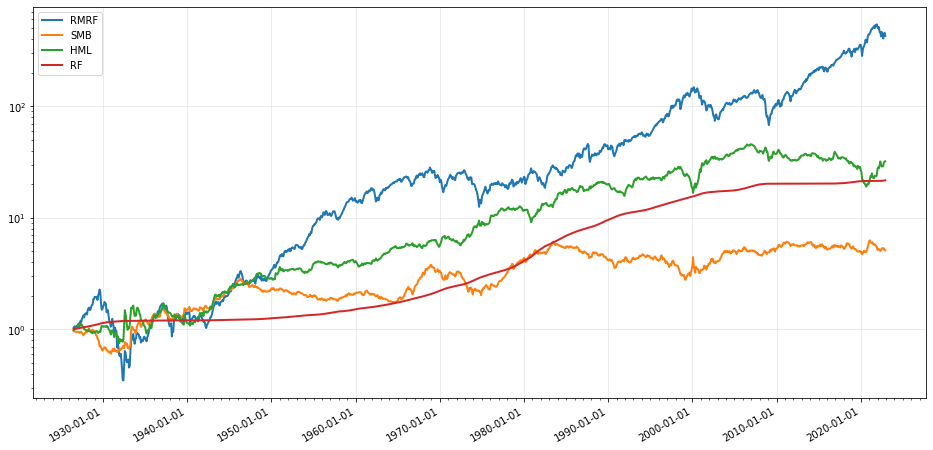

In [ ]:
fig, ax = plt.subplots()

(1+ff).cumprod().plot(figsize=(16,8), lw=2, ax=ax, logy=True, xlabel='', x_compat=True)

# (1+ff).cumprod().plot(figsize=(16,8), lw=2, ax=ax, logy=True, xlabel='')

# change year locations
from matplotlib.dates import YearLocator
ax.xaxis.set_major_locator(YearLocator(10))
ax.xaxis.set_minor_locator(YearLocator(1))

ax.grid(alpha=0.3)
ax.legend(loc='upper left')
plt.show()

CAPM is β * E(Rₘᵉ). Beta reflects the risk relative to the market and the Latter reflects how much return per unit of risk.

In [ ]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', 2000)[0]
ff = ff.rename(columns={'Mkt-RF':'RMRF'})
ff = ff / 100

In [ ]:
sp500 = pd.read_csv('https://raw.githubusercontent.com/stoffprof/qf23/main/data/sp500_yahoo.csv',
                    index_col='Date', parse_dates=['Date'])

rets = sp500.pct_change().dropna(how='all')

rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5598 entries, 2000-01-04 to 2022-04-01
Columns: 505 entries, MMM to ZTS
dtypes: float64(505)
memory usage: 21.6 MB


In [ ]:
rets

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.039735,-0.014409,-0.028571,NaN,-0.023973,NaN,-0.030419,-0.010417,-0.083889,0.000000,...,-0.022178,NaN,NaN,0.023027,NaN,-0.020100,-0.014428,NaN,-0.048423,NaN
2000-01-05,0.028965,-0.002924,-0.001839,NaN,0.010526,NaN,0.003921,-0.015788,0.019771,-0.009615,...,0.061856,NaN,NaN,0.038586,NaN,0.005127,0.019144,NaN,-0.001183,NaN
2000-01-06,0.080429,-0.014663,0.034991,NaN,0.001736,NaN,-0.019531,0.005347,0.008163,0.013350,...,0.021359,NaN,NaN,-0.009288,NaN,-0.008503,-0.054144,NaN,0.014218,NaN
2000-01-07,0.019851,0.041667,0.010676,NaN,-0.005199,NaN,0.027888,0.015957,0.048583,0.022754,...,0.026617,NaN,NaN,0.000000,NaN,-0.022298,-0.011098,NaN,0.002337,NaN
2000-01-10,-0.004866,0.011428,-0.007042,NaN,0.142857,NaN,0.050387,0.000000,0.038610,0.024590,...,-0.018519,NaN,NaN,0.000000,NaN,0.040351,0.033668,NaN,-0.018066,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,-0.006580,-0.004629,0.008743,0.003967,0.009188,0.009246,0.005151,-0.012194,0.042607,0.007350,...,-0.017119,0.012017,-0.001744,0.007638,0.001846,0.013125,-0.007941,0.003193,-0.018993,-0.000317
2022-03-29,0.017462,0.012301,0.001667,0.001296,0.030111,0.030084,0.009249,-0.048836,0.036266,0.019488,...,0.004204,0.010546,0.020217,0.008282,0.027864,0.008499,0.037463,0.031031,0.000143,0.015367
2022-03-30,-0.004274,-0.018228,0.001581,0.009681,-0.009020,-0.006546,-0.004830,0.016621,-0.013445,0.012492,...,0.006280,-0.013887,-0.007095,0.006822,-0.013106,-0.011291,-0.019379,-0.006868,-0.033983,-0.004993


In [ ]:
df = pd.merge(rets['LLY'], ff, left_index=True, right_index=True)
df

,LLY,RMRF,SMB,HML,RF
Date,,,,,
2000-01-04,-0.031459,-0.0406,0.0000,0.0206,0.00021
2000-01-05,0.012795,-0.0009,0.0020,0.0016,0.00021
2000-01-06,0.029155,-0.0073,-0.0043,0.0126,0.00021
2000-01-07,0.073654,0.0321,-0.0047,-0.0142,0.00021
2000-01-10,-0.041336,0.0176,0.0096,-0.0153,0.00021
...,...,...,...,...,...
2022-03-28,0.009134,0.0073,-0.0056,-0.0169,0.00000
2022-03-29,-0.011212,0.0145,0.0154,-0.0193,0.00000
2022-03-30,0.005201,-0.0083,-0.0127,0.0040,0.00000


In [ ]:
# Getting rid of the risk free rate
df['exret'] = df['LLY'] - df['RF']
df = df.dropna()

In [ ]:
df

,LLY,RMRF,SMB,HML,RF,exret
Date,,,,,,
2000-01-04,-0.031459,-0.0406,0.0000,0.0206,0.00021,-0.031669
2000-01-05,0.012795,-0.0009,0.0020,0.0016,0.00021,0.012585
2000-01-06,0.029155,-0.0073,-0.0043,0.0126,0.00021,0.028945
2000-01-07,0.073654,0.0321,-0.0047,-0.0142,0.00021,0.073444
2000-01-10,-0.041336,0.0176,0.0096,-0.0153,0.00021,-0.041546
...,...,...,...,...,...,...
2022-03-28,0.009134,0.0073,-0.0056,-0.0169,0.00000,0.009134
2022-03-29,-0.011212,0.0145,0.0154,-0.0193,0.00000,-0.011212
2022-03-30,0.005201,-0.0083,-0.0127,0.0040,0.00000,0.005201


In [ ]:
import statsmodels.api as sm

In [ ]:
reg_model = sm.OLS(df['exret'], sm.add_constant(df['RMRF']))

reg_rslt = reg_model.fit()

print(reg_rslt.summary())

                            OLS Regression Results                            
Dep. Variable:                  exret   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1744.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:28:28   Log-Likelihood:                 15640.
No. Observations:                5598   AIC:                        -3.128e+04
Df Residuals:                    5596   BIC:                        -3.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.369      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The problem with this model is that β looks to be the same over the course of the year.

In [ ]:
reg_model = sm.OLS(df['exret'],
                   sm.add_constant(df[['RMRF', 'SMB', 'HML']]))

reg_rslt = reg_model.fit()

print(reg_rslt.summary())

                            OLS Regression Results                            
Dep. Variable:                  exret   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     635.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:46:42   Log-Likelihood:                 15702.
No. Observations:                5598   AIC:                        -3.140e+04
Df Residuals:                    5594   BIC:                        -3.137e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.534      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
reg_rslt.params

const    0.000300
RMRF     0.684447
SMB     -0.342549
HML     -0.078720
dtype: float64

In [ ]:
reg_rslt.tvalues

const     1.533558
RMRF     43.326331
SMB     -10.997645
HML      -3.092456
dtype: float64

In [ ]:
reg_rslt.rsquared

0.2542202186701229

In [ ]:
reg_rslt.resid

Date
2000-01-04   -0.002559
2000-01-05    0.013711
2000-01-06    0.033160
2000-01-07    0.048445
2000-01-10   -0.051809
                ...   
2022-03-28    0.000589
2022-03-29   -0.017681
2022-03-30    0.006546
2022-03-31    0.000286
2022-04-01    0.020919
Length: 5598, dtype: float64

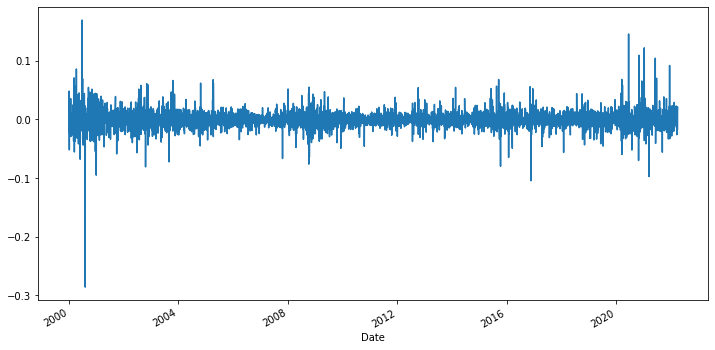

In [ ]:
# Idiosyncrantic Volatility: Volatility that is unrelated to the market
reg_rslt.resid.plot(figsize=(12,6));

In [ ]:
# rename RF so it doesn't clash with ticker RF

ff = ff.rename(columns={'RF': 'rf'})

In [ ]:
def regression(ticker):
    df = pd.merge(ff, rets[ticker], left_index=True, right_index=True)
    df = df.dropna()
    df['exret'] = df[ticker] - df['rf']
    reg_model = sm.OLS(df['exret'],
                       sm.add_constant(df[['RMRF', 'SMB', 'HML']]))
    reg_rslt = reg_model.fit()
    params = reg_rslt.params
    tvals = reg_rslt.tvalues
    tvals.index = map(lambda x: 't_'+x, tvals.index)  # rename t-value index values
    rslt = pd.concat([params, tvals])
    rslt['R2'] = reg_rslt.rsquared
    rslt['N'] = reg_rslt.nobs
    return(rslt, reg_rslt.resid)

In [ ]:
rslt, resid = regression("LLY")
rslt

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.000300
RMRF          0.684447
SMB          -0.342549
HML          -0.078720
t_const       1.533558
t_RMRF       43.326331
t_SMB       -10.997645
t_HML        -3.092456
R2            0.254220
N          5598.000000
dtype: float64

In [ ]:
resid

Date
2000-01-04   -0.002559
2000-01-05    0.013711
2000-01-06    0.033160
2000-01-07    0.048445
2000-01-10   -0.051809
                ...   
2022-03-28    0.000589
2022-03-29   -0.017681
2022-03-30    0.006546
2022-03-31    0.000286
2022-04-01    0.020919
Length: 5598, dtype: float64

In [ ]:
betas = {}
resids = {}
for tic in rets:
    rslt, resid = regression(tic)
    betas[tic] = rslt
    resids[tic] = resid

resids = pd.DataFrame(resids)

# transpose betas dataframe so coefficient estimates are columns
betas = pd.DataFrame(betas).T
betas

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

,const,RMRF,SMB,HML,t_const,t_RMRF,t_SMB,t_HML,R2,N
MMM,0.000107,0.793478,-0.172604,0.215761,0.728567,67.075571,-7.400232,11.318978,0.461515,5598.0
AOS,0.000396,0.886165,0.491453,0.377775,1.746974,48.473369,13.634382,12.824099,0.348253,5598.0
ABT,0.000431,0.631901,-0.356982,-0.133692,2.459603,44.680849,-12.802182,-5.866535,0.267863,5598.0
ABBV,0.000438,0.835245,-0.168996,-0.116550,1.430220,29.061098,-3.294421,-3.140182,0.268505,2329.0
ABMD,0.000754,1.111644,0.804867,-0.384085,1.722699,31.479591,11.559867,-6.749882,0.185478,5598.0
...,...,...,...,...,...,...,...,...,...,...
YUM,0.000425,0.782000,-0.032449,0.142497,2.076847,47.404384,-0.997661,5.360714,0.296422,5598.0
ZBRA,0.000391,1.015638,0.510139,-0.166483,1.491884,48.103279,12.254333,-4.893408,0.323328,5598.0
ZBH,0.000114,0.763228,0.136674,0.073282,0.549503,43.872839,3.943862,2.572812,0.292529,5205.0
ZION,-0.000151,1.200056,0.186312,1.685215,-0.586432,57.802091,4.551445,50.373529,0.536626,5598.0


CAPM is not correct. There are more complex models that can derive potential returns for an asset.

-  Look to the OLS regression results and assess what the coefficients mean and understand statistical significance.
